# Linear Regression

## A Line of Best Fit
Trying to "fit" a straight "best-fit" line to some data to illustrate a trend.  
Break down the data in 2 variables, i.e a person's age and their bone density.   
This uses "OLS", ordinary least squares: minimize the squared-error between each point, each cross-section between the two variables, and the best-fit line.  

## Measure Best-Fit with R-Squared
R-Squared, the Coefficient of determination, represents the "variation" of the data as compared to the line of best-fit:
- the "distance" between each "point" and the best-fit line is the **error**
- get the squared error of each point
- get the sum of squared errors, call this the **numerator** for now
- get the sum of the squared variation from the mean, call this **the denominator** for now
- divide: numerator / denominator = r-squared
  - (sum of the squared erros) / (sum of the squared variation from the mean)

R-Squared is a value between 0-and-1.  
0 is worst, 1 is best.  0 is all error, 1 is a "perfect fit".  

## Imports

In [15]:
%matplotlib inline
import numpy as np
from pylab import *
from scipy import stats
import matplotlib.pyplot as plt
import random

## Make Some Data
Here, some highly-correlated data

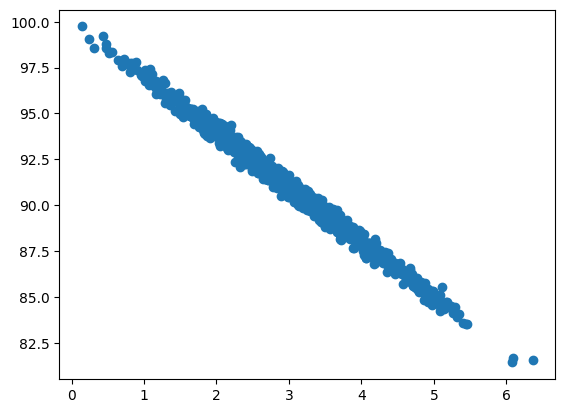

In [6]:
spread = 1
howManyPoints = 1000
avgPageSpeedInSeconds = 3
pgSpeedStdDevInSeconds = 1

pageSpeeds = np.random.normal(avgPageSpeedInSeconds, pgSpeedStdDevInSeconds, howManyPoints)
purchaseAmounts = 100 - (pageSpeeds + np.random.normal(0, 0.1, howManyPoints)) * 3

# pageSpeeds = np.random.normal(25, 1.0, howManyPoints)
# purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, spread, howManyPoints)) * 3

scatter(pageSpeeds, purchaseAmounts)

## Start The Regression Work

### Apply scpipy stats to get linearRegression data points

As we only have two features, we can keep it simple and just use scipy.stats.linregress. [DOCS HERE](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmounts)
print("r-Squared:", str(r_value ** 2))
print("slope:",str(slope))
print("p_value:",str(p_value))
print("std_err:",str(std_err))

r-Squared: 0.9905342103689134
slope: -3.009219059072717
p_value: 0.0
std_err: 0.009311769511399047


NOTE: the r-squared is almost 1, which is representative that the best-fit-line is a great fit to the data.  

### Predict And Plot
Let's use the slope and intercept we got from the regression to plot predicted values vs. observed.  


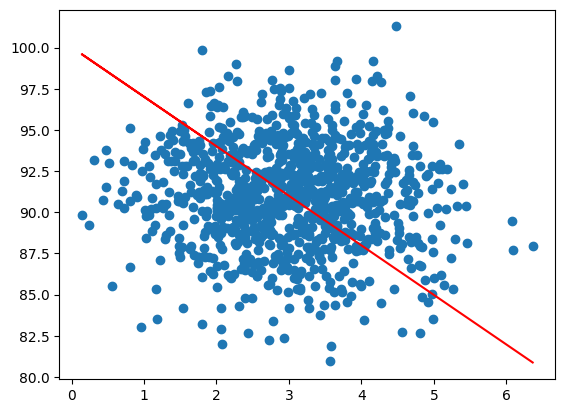

In [19]:
fitLine = slope * pageSpeeds + intercept
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

## A Less-Fitting Example

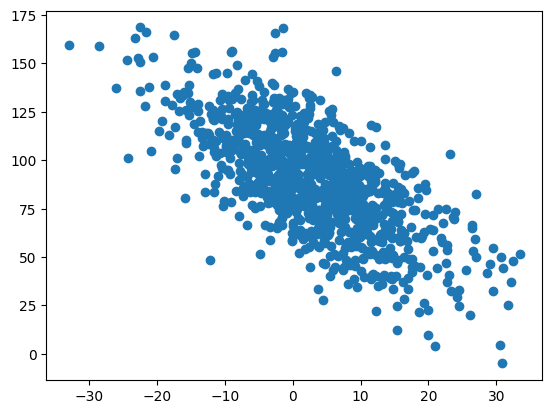

In [25]:
spreadTwo = 1
howManyPointsTwo = 1000
avgPageSpeedInSecondsTwo = 3
pgSpeedStdDevInSecondsTwo = 10

pageSpeedsTwo = np.random.normal(avgPageSpeedInSecondsTwo, pgSpeedStdDevInSecondsTwo, howManyPointsTwo)
purchaseAmountsTwo = random.randint(50,100) - (pageSpeedsTwo + np.random.normal(0, 10, howManyPointsTwo)) * random.randint(1, 4)

# pageSpeeds = np.random.normal(25, 1.0, howManyPoints)
# purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, spread, howManyPoints)) * 3

scatter(pageSpeedsTwo, purchaseAmountsTwo)

In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeedsTwo, purchaseAmountsTwo)
print("r-Squared:", str(r_value ** 2))
print("slope:",str(slope))
print("p_value:",str(p_value))
print("std_err:",str(std_err))

r-Squared: 0.48677218147853507
slope: -1.9197062352026255
p_value: 1.0067704325631984e-146
std_err: 0.062396714665880856


NOTE: the r-Squared is .486, significantly less than the previous example, showing a less-fitting best-fit-line.

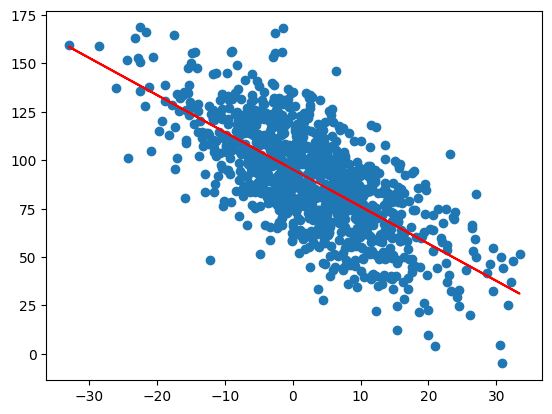

In [29]:
fitLineTwo = slope * pageSpeedsTwo + intercept
plt.scatter(pageSpeedsTwo, purchaseAmountsTwo)
plt.plot(pageSpeedsTwo, fitLineTwo, c='r')
plt.show()